<head>
    <title> AI for the industry </title>
    </head>


DESCRIPTION: A company producing fiber optic sensors decided to implement the concept
of Industry 4.0 in one of their production processes. They are going to
implement the AI techniques to automate verification of produced sensors.
Currently, after the production of the sensor, its characteristics should be
verified each time in three reference substances in order to configure:
<ui>
    <li> Air </li>
    <li> Water </li>
    <li> Isopropanol </li>
    </ui>
After the procedure in the laboratory they collected three spectroscopic
signals. Unfortunately, such procedures are extremely time consuming and
require large human resources. Therefore they are planning to implement AI
algorithms in order to predict characteristics (or any other parameters – you
can propose something) of a working sensor in water and isopropanol based
on measured characteristics in air. It will enable to reduce validation process
only to measurements in the air, but other characteristics will be collected
based on the proposed model.


<h1>1. Import of needed packages and checking of python and pandas version<h1>

In [ ]:
pip install -U scikit-learn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error 

In [ ]:
from platform import python_version
print(python_version())

In [ ]:
print(pd.__version__)

<h1>2. import of data and dataframes generation<h1>



Data are saved as .txt files however the data format looks like .csv format - two series of numebrs are separated with ",".

All Data from link to GoogleDrive were downloaded to local drive for this project. However, I can imagine that in the future the number of collected data will be higher and some ETL tools should be used then to collect the data, process them, analyse and use. For now, I propose Python-based tools (OS and Pandas packages).

In [4]:
# link to folder with data on my local drive
data_folder = '/Users/izabela_kania_ds/DataScience/DS_Projects/Codecool_recruitment_task/Dataset/**/*'

# list of content data_folder
for filename in glob.iglob(data_folder,
                           recursive = True):
    print(filename)

/Users/izabela_kania_ds/DataScience/DS_Projects/Codecool_recruitment_task/Dataset/sesion_07_20
/Users/izabela_kania_ds/DataScience/DS_Projects/Codecool_recruitment_task/Dataset/sesion_03_20
/Users/izabela_kania_ds/DataScience/DS_Projects/Codecool_recruitment_task/Dataset/sesion_02_20
/Users/izabela_kania_ds/DataScience/DS_Projects/Codecool_recruitment_task/Dataset/sesion_06_20
/Users/izabela_kania_ds/DataScience/DS_Projects/Codecool_recruitment_task/Dataset/sesion_09_20
/Users/izabela_kania_ds/DataScience/DS_Projects/Codecool_recruitment_task/Dataset/sesion_08_20
/Users/izabela_kania_ds/DataScience/DS_Projects/Codecool_recruitment_task/Dataset/sesion_01_20
/Users/izabela_kania_ds/DataScience/DS_Projects/Codecool_recruitment_task/Dataset/sesion_05_20
/Users/izabela_kania_ds/DataScience/DS_Projects/Codecool_recruitment_task/Dataset/sesion_04_20
/Users/izabela_kania_ds/DataScience/DS_Projects/Codecool_recruitment_task/Dataset/sesion_10_20
/Users/izabela_kania_ds/DataScience/DS_Projects/Co

As we can see, the data is structured in 10 folders named as "session_noXX_20" and each contains 3 .txt files wchich are spectral readouts of the corresponding sensor in the air, water and izopropanol. 

Let's create lists of data sets readouts in each environment separative.

In [ ]:
# creating of lists with data sets collecting readouts in air, water and isopropanol

air_data = glob.glob(data_folder + '*air.*')
air_data

In [ ]:
water_data = glob.glob(data_folder + '*water.*')
water_data

In [ ]:
izopropanol_data = glob.glob(data_folder + '*izopropanol.*')
izopropanol_data

Looking into one sample dataset

In [5]:
air06 = pd.read_csv('/Users/izabela_kania_ds/DataScience/DS_Projects/Codecool_recruitment_task/Dataset/sesion_06_20/sensor06_air.txt', header=None, index_col=False)
water06 = pd.read_csv('/Users/izabela_kania_ds/DataScience/DS_Projects/Codecool_recruitment_task/Dataset/sesion_06_20/sensor06_water.txt', header=None, index_col=False)
izopropanol06 = pd.read_csv('/Users/izabela_kania_ds/DataScience/DS_Projects/Codecool_recruitment_task/Dataset/sesion_06_20/sensor06_izopropanol.txt', header=None, index_col=False)
print('sensor 06 in the air:', air06.head())
print('sensor 06 in the water:', water06.head())
print('sensor 06 in isopropanol:', izopropanol06.head())

sensor 06 in the air:           0       1
0  0.000001  9.4554
1  0.000001  9.6052
2  0.000001  9.6264
3  0.000001  9.5136
4  0.000001  9.4042
sensor 06 in the water:           0       1
0  0.000001  8.7331
1  0.000001  8.7934
2  0.000001  8.7887
3  0.000001  8.7277
4  0.000001  8.7171
sensor 06 in isopropanol:           0       1
0  0.000001  8.8085
1  0.000001  9.0038
2  0.000001  8.9254
3  0.000001  8.8786
4  0.000001  8.8290


Observations:
<ul>
    <li>Data are complete, there are no NaN</li>
    <li>Dataframe does not contain header </li>
    <li>First column is a wavelenght expressed in meters. Usually, wavelenght is expressed in nanometers, which is 1/1000000000 of meter</li>
    <li>In the second column we have Signal Amplitude </li>

</ul>

<h2>2.1 Generation of dataframe for each environment</h2>

In [7]:
# Dataframe modification to be more readable



def mod_df(df):
    df.columns = ['Wavelenght [nm]', 'Amplitude']
    df['Wavelenght [nm]'] = df['Wavelenght [nm]'] * 1000000000
    return


In [8]:
# checking whether the function mod_df(df) works

mod_df(izopropanol06)
izopropanol06

,Wavelenght [nm],Amplitude
0,1350.0,8.8085
1,1350.1,9.0038
2,1350.2,8.9254
3,1350.3,8.8786
4,1350.4,8.8290
...,...,...
2996,1649.6,-1.5332
2997,1649.7,-1.3984
2998,1649.8,-1.4084
2999,1649.9,-1.1342


In [9]:
# checking whether the function mod_df(df) works

mod_df(water06)
water06

,Wavelenght [nm],Amplitude
0,1350.0,8.7331
1,1350.1,8.7934
2,1350.2,8.7887
3,1350.3,8.7277
4,1350.4,8.7171
...,...,...
2996,1649.6,-1.8323
2997,1649.7,-1.7141
2998,1649.8,-1.9062
2999,1649.9,-1.7105


In [10]:
# checking whether the function mod_df(df) works
mod_df(air06)
air06

,Wavelenght [nm],Amplitude
0,1350.0,9.4554
1,1350.1,9.6052
2,1350.2,9.6264
3,1350.3,9.5136
4,1350.4,9.4042
...,...,...
2996,1649.6,2.4787
2997,1649.7,2.9384
2998,1649.8,2.4859
2999,1649.9,2.9317


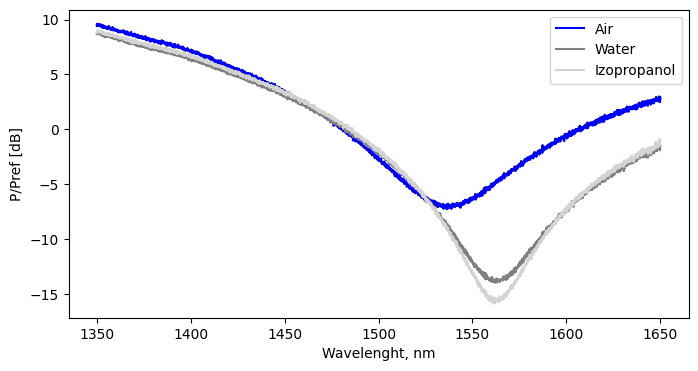

In [14]:
# ploting of data from Sensor06 readouts

fig, ax = plt.subplots(figsize=(8, 4))

ax.set_xlabel("Wavelenght, nm")
ax.set_ylabel("P/Pref [dB]")

ax.plot(air06['Wavelenght [nm]'], air06['Amplitude'], color = 'blue', label = 'Air')
ax.plot(water06['Wavelenght [nm]'], water06['Amplitude'], color = 'grey', label = 'Water')
ax.plot(izopropanol06['Wavelenght [nm]'], izopropanol06['Amplitude'], color = 'lightgrey', label = 'Izopropanol')

ax.legend()

plt.show()


For modeling, I will use data from 8 sensors (numbered as sensor1-sensor8); 2 of them I will use for deployment.

Sensor ID will be added to dataframes as a new column, however it would be not used as parameter for modelling.

In [19]:
# creating of datasets 

air_files = sorted(glob.glob(data_folder + '*0[0-8]_air.txt'))


files = []

for filename in air_files:
    df = pd.read_csv(filename, header=None, index_col=None)
    mod_df(df)
    df['SensorID']=filename[-16:-8]
    df = df[['SensorID'] + list(df.columns[:-1])]
    files.append(df)

air_df = pd.concat(files, axis=0, ignore_index=True)

air_df

,SensorID,Wavelenght [nm],Amplitude
0,sensor01,1350.0,9.1792
1,sensor01,1350.1,9.2003
2,sensor01,1350.2,9.1968
3,sensor01,1350.3,9.1028
4,sensor01,1350.4,9.0601
...,...,...,...
24003,sensor08,1649.6,3.7791
24004,sensor08,1649.7,3.6568
24005,sensor08,1649.8,3.7064
24006,sensor08,1649.9,3.7920


In [16]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24008 entries, 0 to 24007
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SensorID         24008 non-null  object 
 1   Wavelenght [nm]  24008 non-null  float64
 2   Amplitude        24008 non-null  float64
dtypes: float64(2), object(1)
memory usage: 562.8+ KB


In [20]:
water_files = sorted(glob.glob(data_folder + '*0[0-8]_water.txt'))


files = []

for filename in water_files:
    df = pd.read_csv(filename, header=None, index_col=None)
    mod_df(df)
    df['SensorID']=filename[-18:-10]
    df = df[['SensorID'] + list(df.columns[:-1])]
    files.append(df)

water_df = pd.concat(files, axis=0, ignore_index=True)

water_df

,SensorID,Wavelenght [nm],Amplitude
0,sensor01,1350.0,8.35700
1,sensor01,1350.1,8.42870
2,sensor01,1350.2,8.44220
3,sensor01,1350.3,8.41440
4,sensor01,1350.4,8.40340
...,...,...,...
24003,sensor08,1649.6,-0.47930
24004,sensor08,1649.7,-0.51990
24005,sensor08,1649.8,-0.77034
24006,sensor08,1649.9,-0.40282


In [21]:
water_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24008 entries, 0 to 24007
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SensorID         24008 non-null  object 
 1   Wavelenght [nm]  24008 non-null  float64
 2   Amplitude        24008 non-null  float64
dtypes: float64(2), object(1)
memory usage: 562.8+ KB


In [22]:
izopropanol_files = sorted(glob.glob(data_folder + '*0[0-8]_izopropanol.txt'))


files = []

for filename in izopropanol_files:
    df = pd.read_csv(filename, header=None, index_col=None)
    mod_df(df)
    df['SensorID']=filename[-24:-16]
    df = df[['SensorID'] + list(df.columns[:-1])]
    files.append(df)

izopropanol_df = pd.concat(files, axis=0, ignore_index=True)

izopropanol_df

,SensorID,Wavelenght [nm],Amplitude
0,sensor01,1350.0,8.555100
1,sensor01,1350.1,8.675000
2,sensor01,1350.2,8.711600
3,sensor01,1350.3,8.715700
4,sensor01,1350.4,8.679200
...,...,...,...
24003,sensor08,1649.6,-0.179920
24004,sensor08,1649.7,-0.329130
24005,sensor08,1649.8,-0.503520
24006,sensor08,1649.9,-0.042660


In [23]:
izopropanol_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24008 entries, 0 to 24007
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SensorID         24008 non-null  object 
 1   Wavelenght [nm]  24008 non-null  float64
 2   Amplitude        24008 non-null  float64
dtypes: float64(2), object(1)
memory usage: 562.8+ KB


NOTE: A function for generatig of the dataframes is needed. I tried to do that and the only problem I need to solve is extraction of Sensor ID in 'Sensor_ID' column from the file path.

'''

def generate_dataframes(df_name):

    file_path = file_path # file path would be: sorted(glob.glob(data_folder + '*0[0-8]_izopropanol.txt')) for izopropanol ect.

    files = []

    for filename in file_path:
        df = pd.read_csv(filename, header=None, index_col=None)
        mod_df(df)
        df['SensorID']=filename[-24:-16] #these idea must be changed; filename[-24:-16] is only for izopropanol data; automation needed
        df = df[['SensorID'] + list(df.columns[:-1])]
        files.append(df)

    df_name = pd.concat(files, axis=0, ignore_index=True)
    return df_name

'''

<h3>Plotting of data <h3>

In [24]:
def spectrum_plot(data):

    fig, ax = plt.subplots(figsize=(10,6))
    sensors = list(data.SensorID.unique())
    for s in sensors:
        df = data.loc[data['SensorID'] == s]
        ax.plot(df['Wavelenght [nm]'], df['Amplitude'])
    ax.set_xlabel("Wavelenght, nm")
    ax.set_ylabel("P/Pref [dB]")
    return

plt.show()

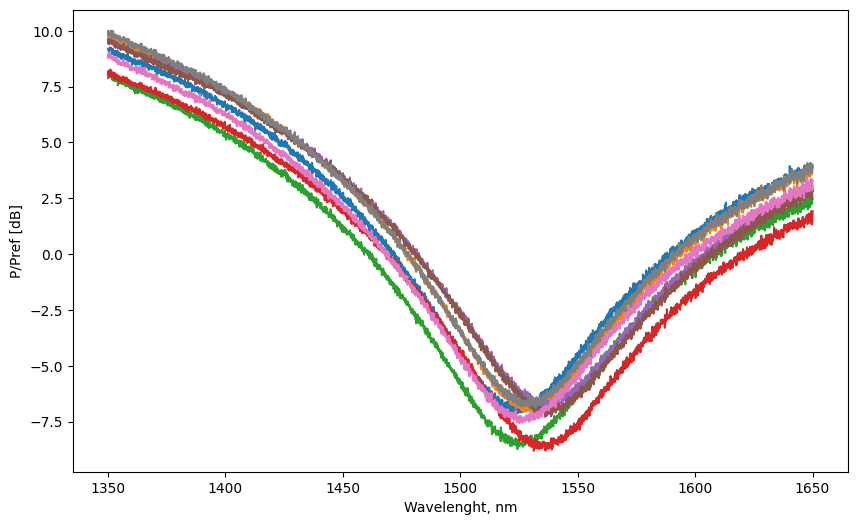

In [25]:
spectrum_plot(air_df)

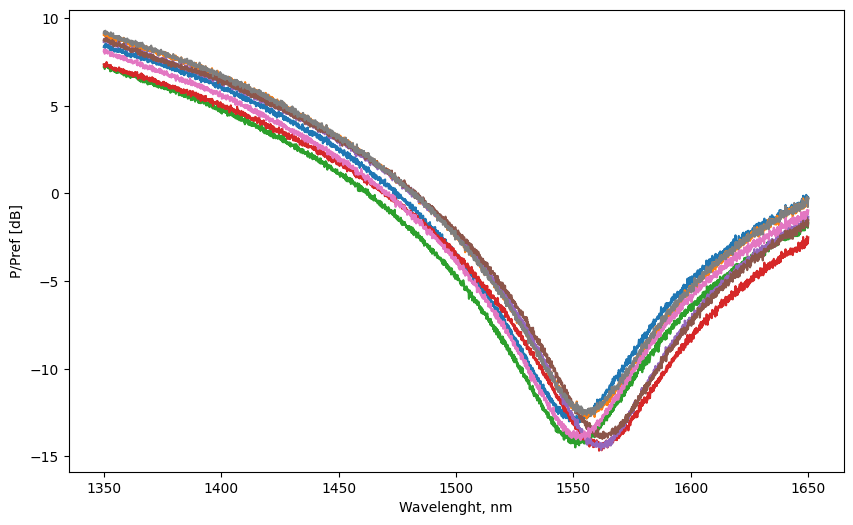

In [26]:
spectrum_plot(water_df)

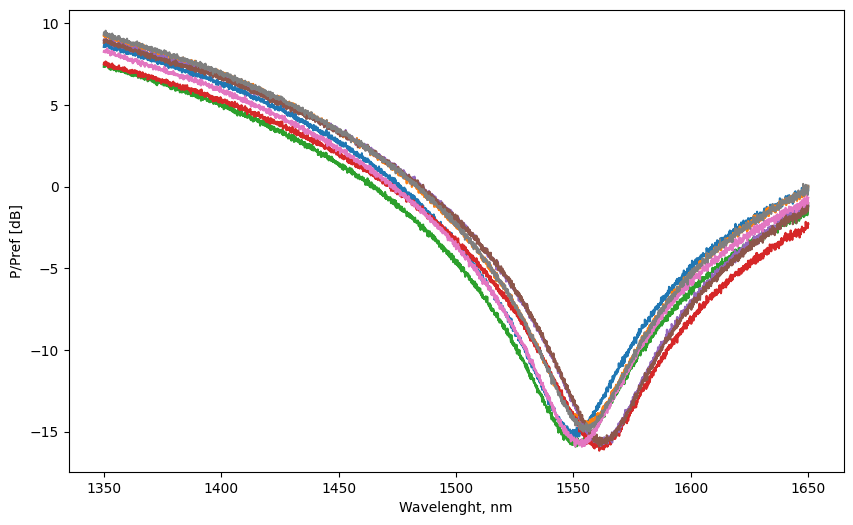

In [27]:
spectrum_plot(izopropanol_df)

<h1>3. Models</h1>

<h2>3.1. Merging data into big dataframe</h2>

In [29]:
# Rename of columns -> clarifying of data after merging

air_df = air_df.rename(columns={'Amplitude' : 'Amplitude in air'})
water_df = water_df.rename(columns={'Amplitude' : 'Amplitude in water'})
izopropanol_df = izopropanol_df.rename(columns={'Amplitude' : 'Amplitude in izopropanol'})


# Dataframe for readouts in the air and in water
data01 = air_df.merge(water_df, on=('SensorID','Wavelenght [nm]'))
data01

,SensorID,Wavelenght [nm],Amplitude in air,Amplitude in water
0,sensor01,1350.0,9.1792,8.35700
1,sensor01,1350.1,9.2003,8.42870
2,sensor01,1350.2,9.1968,8.44220
3,sensor01,1350.3,9.1028,8.41440
4,sensor01,1350.4,9.0601,8.40340
...,...,...,...,...
24003,sensor08,1649.6,3.7791,-0.47930
24004,sensor08,1649.7,3.6568,-0.51990
24005,sensor08,1649.8,3.7064,-0.77034
24006,sensor08,1649.9,3.7920,-0.40282


In [30]:
# Dataframe for readouts in the air and izopropanol

data02 = air_df.merge(izopropanol_df, on=('SensorID', 'Wavelenght [nm]'))
data02

,SensorID,Wavelenght [nm],Amplitude in air,Amplitude in izopropanol
0,sensor01,1350.0,9.1792,8.555100
1,sensor01,1350.1,9.2003,8.675000
2,sensor01,1350.2,9.1968,8.711600
3,sensor01,1350.3,9.1028,8.715700
4,sensor01,1350.4,9.0601,8.679200
...,...,...,...,...
24003,sensor08,1649.6,3.7791,-0.179920
24004,sensor08,1649.7,3.6568,-0.329130
24005,sensor08,1649.8,3.7064,-0.503520
24006,sensor08,1649.9,3.7920,-0.042660


In [31]:
data_all = data01.merge(izopropanol_df, on=('SensorID', 'Wavelenght [nm]'))
data_all

,SensorID,Wavelenght [nm],Amplitude in air,Amplitude in water,Amplitude in izopropanol
0,sensor01,1350.0,9.1792,8.35700,8.555100
1,sensor01,1350.1,9.2003,8.42870,8.675000
2,sensor01,1350.2,9.1968,8.44220,8.711600
3,sensor01,1350.3,9.1028,8.41440,8.715700
4,sensor01,1350.4,9.0601,8.40340,8.679200
...,...,...,...,...,...
24003,sensor08,1649.6,3.7791,-0.47930,-0.179920
24004,sensor08,1649.7,3.6568,-0.51990,-0.329130
24005,sensor08,1649.8,3.7064,-0.77034,-0.503520
24006,sensor08,1649.9,3.7920,-0.40282,-0.042660


Data in column 'Wavelenght [nm]' will be converted to reach 1.XX values

In [32]:
data_all['Wavelenght_units'] = data_all['Wavelenght [nm]'] / 1000
data_all

,SensorID,Wavelenght [nm],Amplitude in air,Amplitude in water,Amplitude in izopropanol,Wavelenght_units
0,sensor01,1350.0,9.1792,8.35700,8.555100,1.3500
1,sensor01,1350.1,9.2003,8.42870,8.675000,1.3501
2,sensor01,1350.2,9.1968,8.44220,8.711600,1.3502
3,sensor01,1350.3,9.1028,8.41440,8.715700,1.3503
4,sensor01,1350.4,9.0601,8.40340,8.679200,1.3504
...,...,...,...,...,...,...
24003,sensor08,1649.6,3.7791,-0.47930,-0.179920,1.6496
24004,sensor08,1649.7,3.6568,-0.51990,-0.329130,1.6497
24005,sensor08,1649.8,3.7064,-0.77034,-0.503520,1.6498
24006,sensor08,1649.9,3.7920,-0.40282,-0.042660,1.6499


<h2>3.2. Splitting data into train and test set </h2>

In [33]:
# determination of dependent and independent variables


X = data_all[['Wavelenght_units', 'Amplitude in air']]
y_water = data_all['Amplitude in water']
y_izopropanol = data_all['Amplitude in izopropanol']



In [35]:
# Split for model in water
X_water_train, X_water_test, y_water_train, y_water_test = train_test_split(X,y_water,test_size=0.2,random_state=40)

#Split for model in izopropanol
X_izo_train, X_izo_test, y_izo_train, y_izo_test = train_test_split(X,y_izopropanol,test_size=0.2,random_state=111)

<h2>3.3. MODEL: polynominal regression</h2>

<h3>3.3a. Water polynominal regression </h3

plotted data showed, that the regression is nonlinear.

In [45]:
# polynominal degree 4
# Variables formatting 

poly = PolynomialFeatures(degree=4) #the plotted data looks like a polynomial regression with degree 3 (or 4)
X_poly = poly.fit_transform(X_water_train)

# model fitting
model01 = LinearRegression()
model01.fit(X_poly, y_water_train)

print('Water - regression model degree 4 INTERCEPT:', model01.intercept_)
print('Water - regression model degree 4 coeffitients:', model01.coef_)

#prediction of training sets
y_poly_pred = model01.predict(X_poly)

# parameters
mae_reg_train= mean_absolute_error(y_water_train, y_poly_pred)
rmse_reg_train = np.sqrt(mean_squared_error(y_water_train, y_poly_pred))
r2_reg_train = r2_score(y_water_train, y_poly_pred)

print('Parameters of water regression model degree 4:')
print('MAE:', mae_reg_train)
print('RMSE:', rmse_reg_train)
print('R2:', r2_reg_train)

Water - regression model degree 4 INTERCEPT: -212283.99616908457
Water - regression model degree 4 coeffitients: [ 0.00000000e+00  5.36986475e+05  8.93712311e+03 -5.08197003e+05
 -1.74105033e+04 -5.62284623e+01  2.13249220e+05  1.12958638e+04
  7.26158516e+01 -2.90109178e-01 -3.34755763e+04 -2.44049269e+03
 -2.34125906e+01  2.03210380e-01  1.80678887e-03]
Parameters of water regression model degree 4:
MAE: 0.41823378923114524
RMSE: 0.600288126675798
R2: 0.9917927555655777


In [ ]:
# Polynominal degree 3
# Variables formatting 

poly = PolynomialFeatures(degree=3) #the plotted data looks like a polynomial regression with degree 3 (or 4)
X_poly = poly.fit_transform(X_water_train)

# model fitting
model01 = LinearRegression()
model01.fit(X_poly, y_water_train)

print('Water - regression model degree 3 INTERCEPT:', model01.intercept_)
print('Water - regression model degree 3 coeffitients:', model01.coef_)

#prediction of training sets
y_poly_pred = model01.predict(X_poly)

# parameters
mae_reg_train= mean_absolute_error(y_water_train, y_poly_pred)
rmse_reg_train = np.sqrt(mean_squared_error(y_water_train, y_poly_pred))
r2_reg_train = r2_score(y_water_train, y_poly_pred)

print('Parameters of water regression model degree 3:')
print('MAE:', mae_reg_train)
print('RMSE:', rmse_reg_train)
print('R2:', r2_reg_train)

Water - regression model degree 3 INTERCEPT: -6904.775957993821
Water - regression model degree 3 coeffitients: [ 0.00000000e+00  1.39291008e+04 -2.34097361e+01 -9.32221341e+03
  2.11286885e+01  2.73834026e+00  2.06950416e+03 -3.36017940e+00
 -1.81563679e+00 -1.04281163e-02]
Parameters of water regression model degree 3:
MAE: 0.495498157545461
RMSE: 0.6968701860659597
R2: 0.9889393250199096


Next, it would be great to plot predicted data vs. data from the frame and make a df of predicted values as a result of modeling:)

In [ ]:
#plotting

<h3>3.3b. Izopropanol polynominal regressor</h3>

In [46]:
# Variables formatting 

poly_izo = PolynomialFeatures(degree=3)
X_izo_poly = poly_izo.fit_transform(X_izo_train)

# Model training: IZOPROPANOL

model02 = LinearRegression()
model02.fit(X_izo_poly, y_izo_train)


print('Water - regression model degree 3 INTERCEPT:', model01.intercept_)
print('Water - regression model degree 3 coeffitients:', model01.coef_)

#prediction of training sets
y_izo_poly_pred = model02.predict(X_izo_poly)

mae_reg_train= mean_absolute_error(y_izo_train, y_izo_poly_pred)
rmse_reg_train = np.sqrt(mean_squared_error(y_izo_train, y_izo_poly_pred))
r2_reg_train = r2_score(y_izo_train, y_izo_poly_pred)

print('Parameters of IZOPROPANOL regression model degree 3 - training set:')
print('MAE', mae_reg_train)
print('RMSE:', rmse_reg_train)
print('R2:', r2_reg_train)


Water - regression model degree 3 INTERCEPT: -212283.99616908457
Water - regression model degree 3 coeffitients: [ 0.00000000e+00  5.36986475e+05  8.93712311e+03 -5.08197003e+05
 -1.74105033e+04 -5.62284623e+01  2.13249220e+05  1.12958638e+04
  7.26158516e+01 -2.90109178e-01 -3.34755763e+04 -2.44049269e+03
 -2.34125906e+01  2.03210380e-01  1.80678887e-03]
Parameters of IZOPROPANOL regression model degree 3 - training set:
MAE 0.6081937587714128
RMSE: 0.8882001088212669
R2: 0.983961528735574


In [48]:
# prediction of TEST data and check RMSE and R2

# formatting of X:

poly_izo = PolynomialFeatures(degree=3)
X_izo_test_poly = poly_izo.fit_transform(X_izo_test)

# prediction
y_izo_test_poly_pred = model02.predict(X_izo_test_poly)


mae_reg_test= mean_absolute_error(y_izo_test, y_izo_test_poly_pred)
rmse_reg_test = np.sqrt(mean_squared_error(y_izo_test, y_izo_test_poly_pred))
r2_reg_test = r2_score(y_izo_test, y_izo_test_poly_pred)

print('Parameters of IZOPROPANOL regression model degree 3 - TEST set:')
print('MAE', mae_reg_test)
print('RMSE:', rmse_reg_test)
print('R2:', r2_reg_test)



Parameters of IZOPROPANOL regression model degree 3 - TEST set:
MAE 0.5950658124276315
RMSE: 0.8768933142686189
R2: 0.98434085395067


In [49]:
# IZOPROPANOL polynominal degree 4

# Variables formatting 

poly_izo = PolynomialFeatures(degree=4)
X_izo_poly = poly_izo.fit_transform(X_izo_train)

# Model training: IZOPROPANOL

model02 = LinearRegression()
model02.fit(X_izo_poly, y_izo_train)


print('Water - regression model degree 4 INTERCEPT:', model01.intercept_)
print('Water - regression model degree 4 coeffitients:', model01.coef_)

#prediction of training sets
y_izo_poly_pred = model02.predict(X_izo_poly)

mae_reg_train= mean_absolute_error(y_izo_train, y_izo_poly_pred)
rmse_reg_train = np.sqrt(mean_squared_error(y_izo_train, y_izo_poly_pred))
r2_reg_train = r2_score(y_izo_train, y_izo_poly_pred)

print('Parameters of IZOPROPANOL regression model degree 4 - training set:')
print('MAE', mae_reg_train)
print('RMSE:', rmse_reg_train)
print('R2:', r2_reg_train)

Water - regression model degree 4 INTERCEPT: -212283.99616908457
Water - regression model degree 4 coeffitients: [ 0.00000000e+00  5.36986475e+05  8.93712311e+03 -5.08197003e+05
 -1.74105033e+04 -5.62284623e+01  2.13249220e+05  1.12958638e+04
  7.26158516e+01 -2.90109178e-01 -3.34755763e+04 -2.44049269e+03
 -2.34125906e+01  2.03210380e-01  1.80678887e-03]
Parameters of IZOPROPANOL regression model degree 4 - training set:
MAE 0.5305138549948749
RMSE: 0.7911451506837693
R2: 0.9872751208310692


In [50]:
#Polynominal degree=4, TEST set
# prediction of TEST data and check RMSE and R2

# formatting of X:

poly_izo = PolynomialFeatures(degree=4)
X_izo_test_poly = poly_izo.fit_transform(X_izo_test)

# prediction
y_izo_test_poly_pred = model02.predict(X_izo_test_poly)


mae_reg_test= mean_absolute_error(y_izo_test, y_izo_test_poly_pred)
rmse_reg_test = np.sqrt(mean_squared_error(y_izo_test, y_izo_test_poly_pred))
r2_reg_test = r2_score(y_izo_test, y_izo_test_poly_pred)

print('Parameters of IZOPROPANOL regression model degree 4 - TEST set:')
print('MAE', mae_reg_test)
print('RMSE:', rmse_reg_test)
print('R2:', r2_reg_test)



Parameters of IZOPROPANOL regression model degree 4 - TEST set:
MAE 0.5242169545645786
RMSE: 0.7894276747682786
R2: 0.9873089004287225


<h2>3.4. MODEL: tree regression </h2>

<h3>3.4a. Water tree regression</h3>

In [53]:
# without hyperparameters
# model fit of water tree regression

model_dt = DecisionTreeRegressor(random_state=111)
model_dt.fit(X_water_train, y_water_train)

# plotting of the tree

fig = plt.figure(figsize=(50,40), dpi=100)
tree_fig = tree.plot_tree(model_dt,feature_names=X.columns, filled=True)



Error in callback <function flush_figures at 0x7fba93fdba60> (for post_execute):


KeyboardInterrupt: 

This fits too long

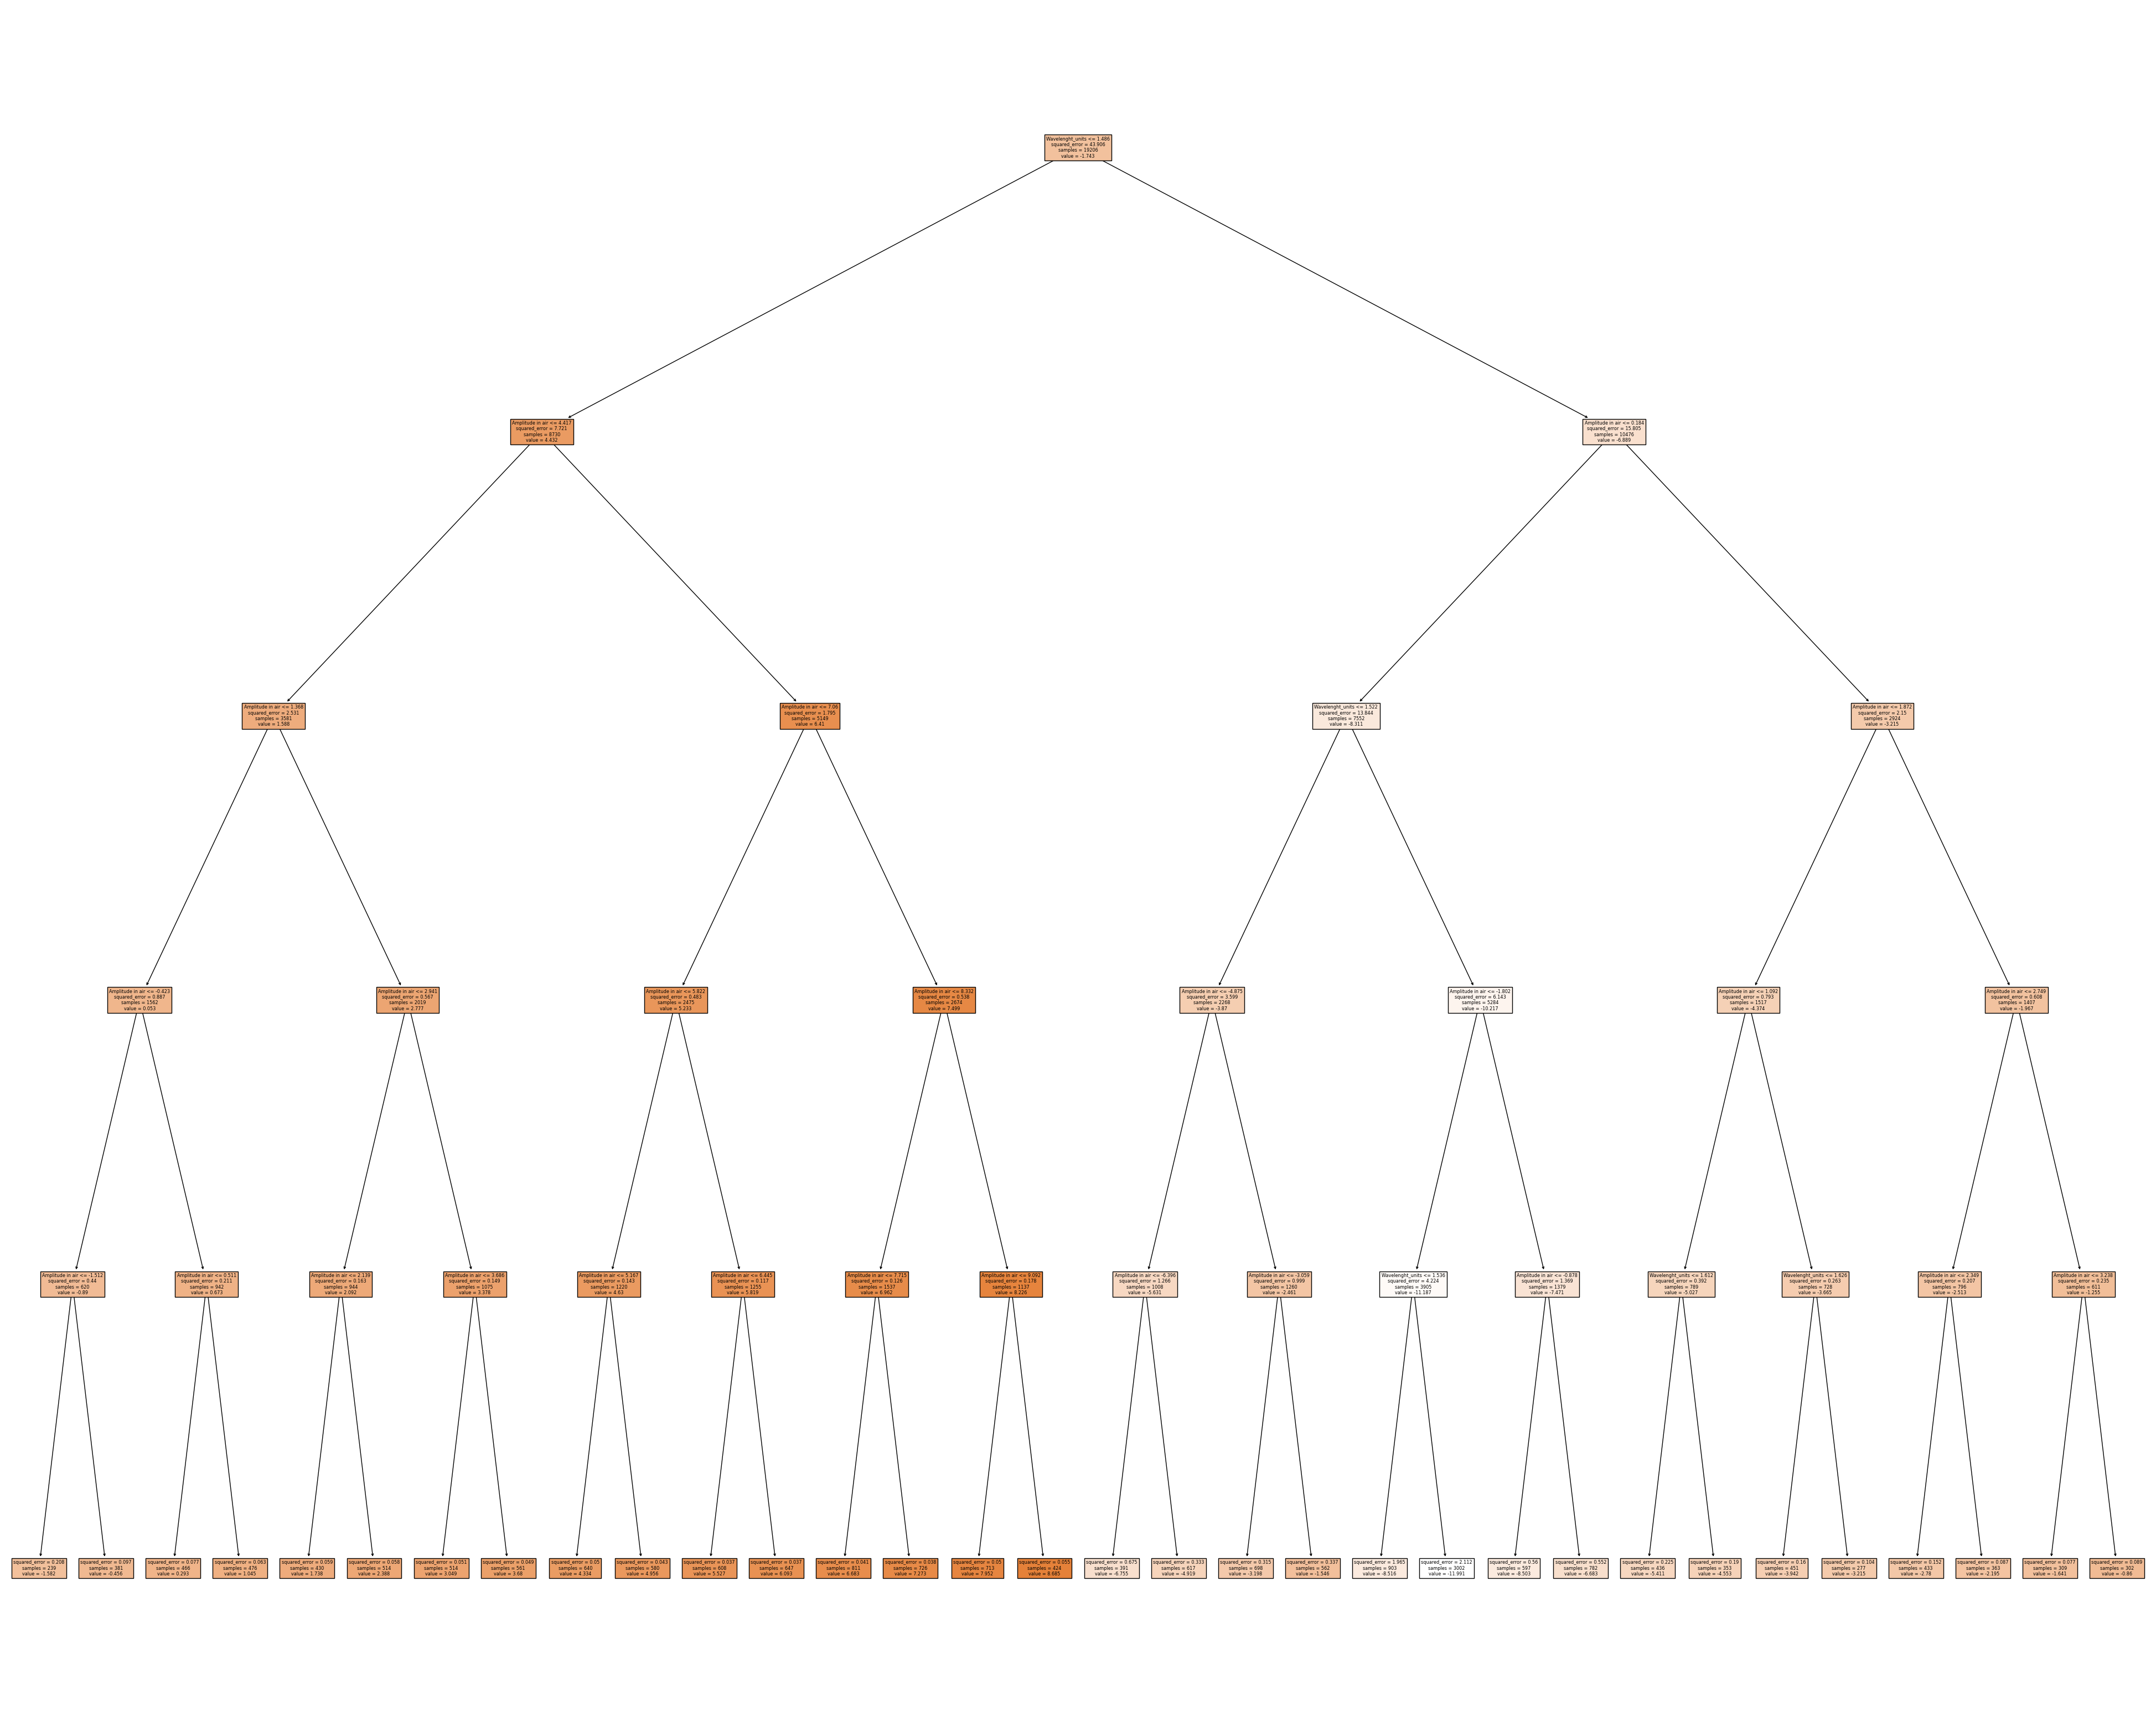

In [51]:
# Decission tree with max_depth=5
# model fit of water tree regression

model_dt = DecisionTreeRegressor(random_state=111, max_depth=5)
model_dt.fit(X_water_train, y_water_train)

# plotting of the tree

fig = plt.figure(figsize=(50,40), dpi=100)
tree_fig = tree.plot_tree(model_dt,feature_names=X.columns, filled=True)

In [52]:
# Prediction for test set
y_water_pred = model_dt.predict(X_water_test)
MAE_tree_test = mean_absolute_error(y_water_test, y_water_pred)
rmse_tree_test = np.sqrt(mean_squared_error(y_water_test, y_water_pred))
r2_tree_test = r2_score(y_water_test, y_water_pred)

#prediction of train set
y_water_train_pred = model_dt.predict(X_water_train)
MAE_tree_train = mean_absolute_error(y_water_train, y_water_train_pred)
rmse_tree_train = np.sqrt(mean_squared_error(y_water_train, y_water_train_pred))
r2_tree_train = r2_score(y_water_train, y_water_train_pred)

print('Parameters for Decision Tree in water - model with max_depth=5')

print('MAE of decission tree regressor test set in water:', MAE_tree_test)
print('MAE of decission tree regressor train set in water:', MAE_tree_train)
print('RMSE of decission tree regressor for test set in water:', rmse_tree_test)
print('RMSE of decission tree regressor for train set in water:', rmse_tree_train)

print('model score for train set:', model_dt.score(X_water_train,y_water_train))
print('model score for test set:', model_dt.score(X_water_test,y_water_test))
print('R2 of decission tree regressor for test set in water:', r2_tree_test)
print('R2 of decission tree regressor for train set in water:', r2_tree_train)


MAE of decission tree regressor test set in water: 0.48313045608763033
MAE of decission tree regressor train set in water: 0.4814845206814348
RMSE of decission tree regressor for test set in water: 0.7497734296209138
RMSE of decission tree regressor for train set in water: 0.7449255275440461
model score for train set: 0.9873612659376436
model score for test set: 0.9869324851738631
R2 of decission tree regressor for test set in water: 0.9869324851738631
R2 of decission tree regressor for train set in water: 0.9873612659376436


<h3>3.4b. Izopropanol tree regression</h3>

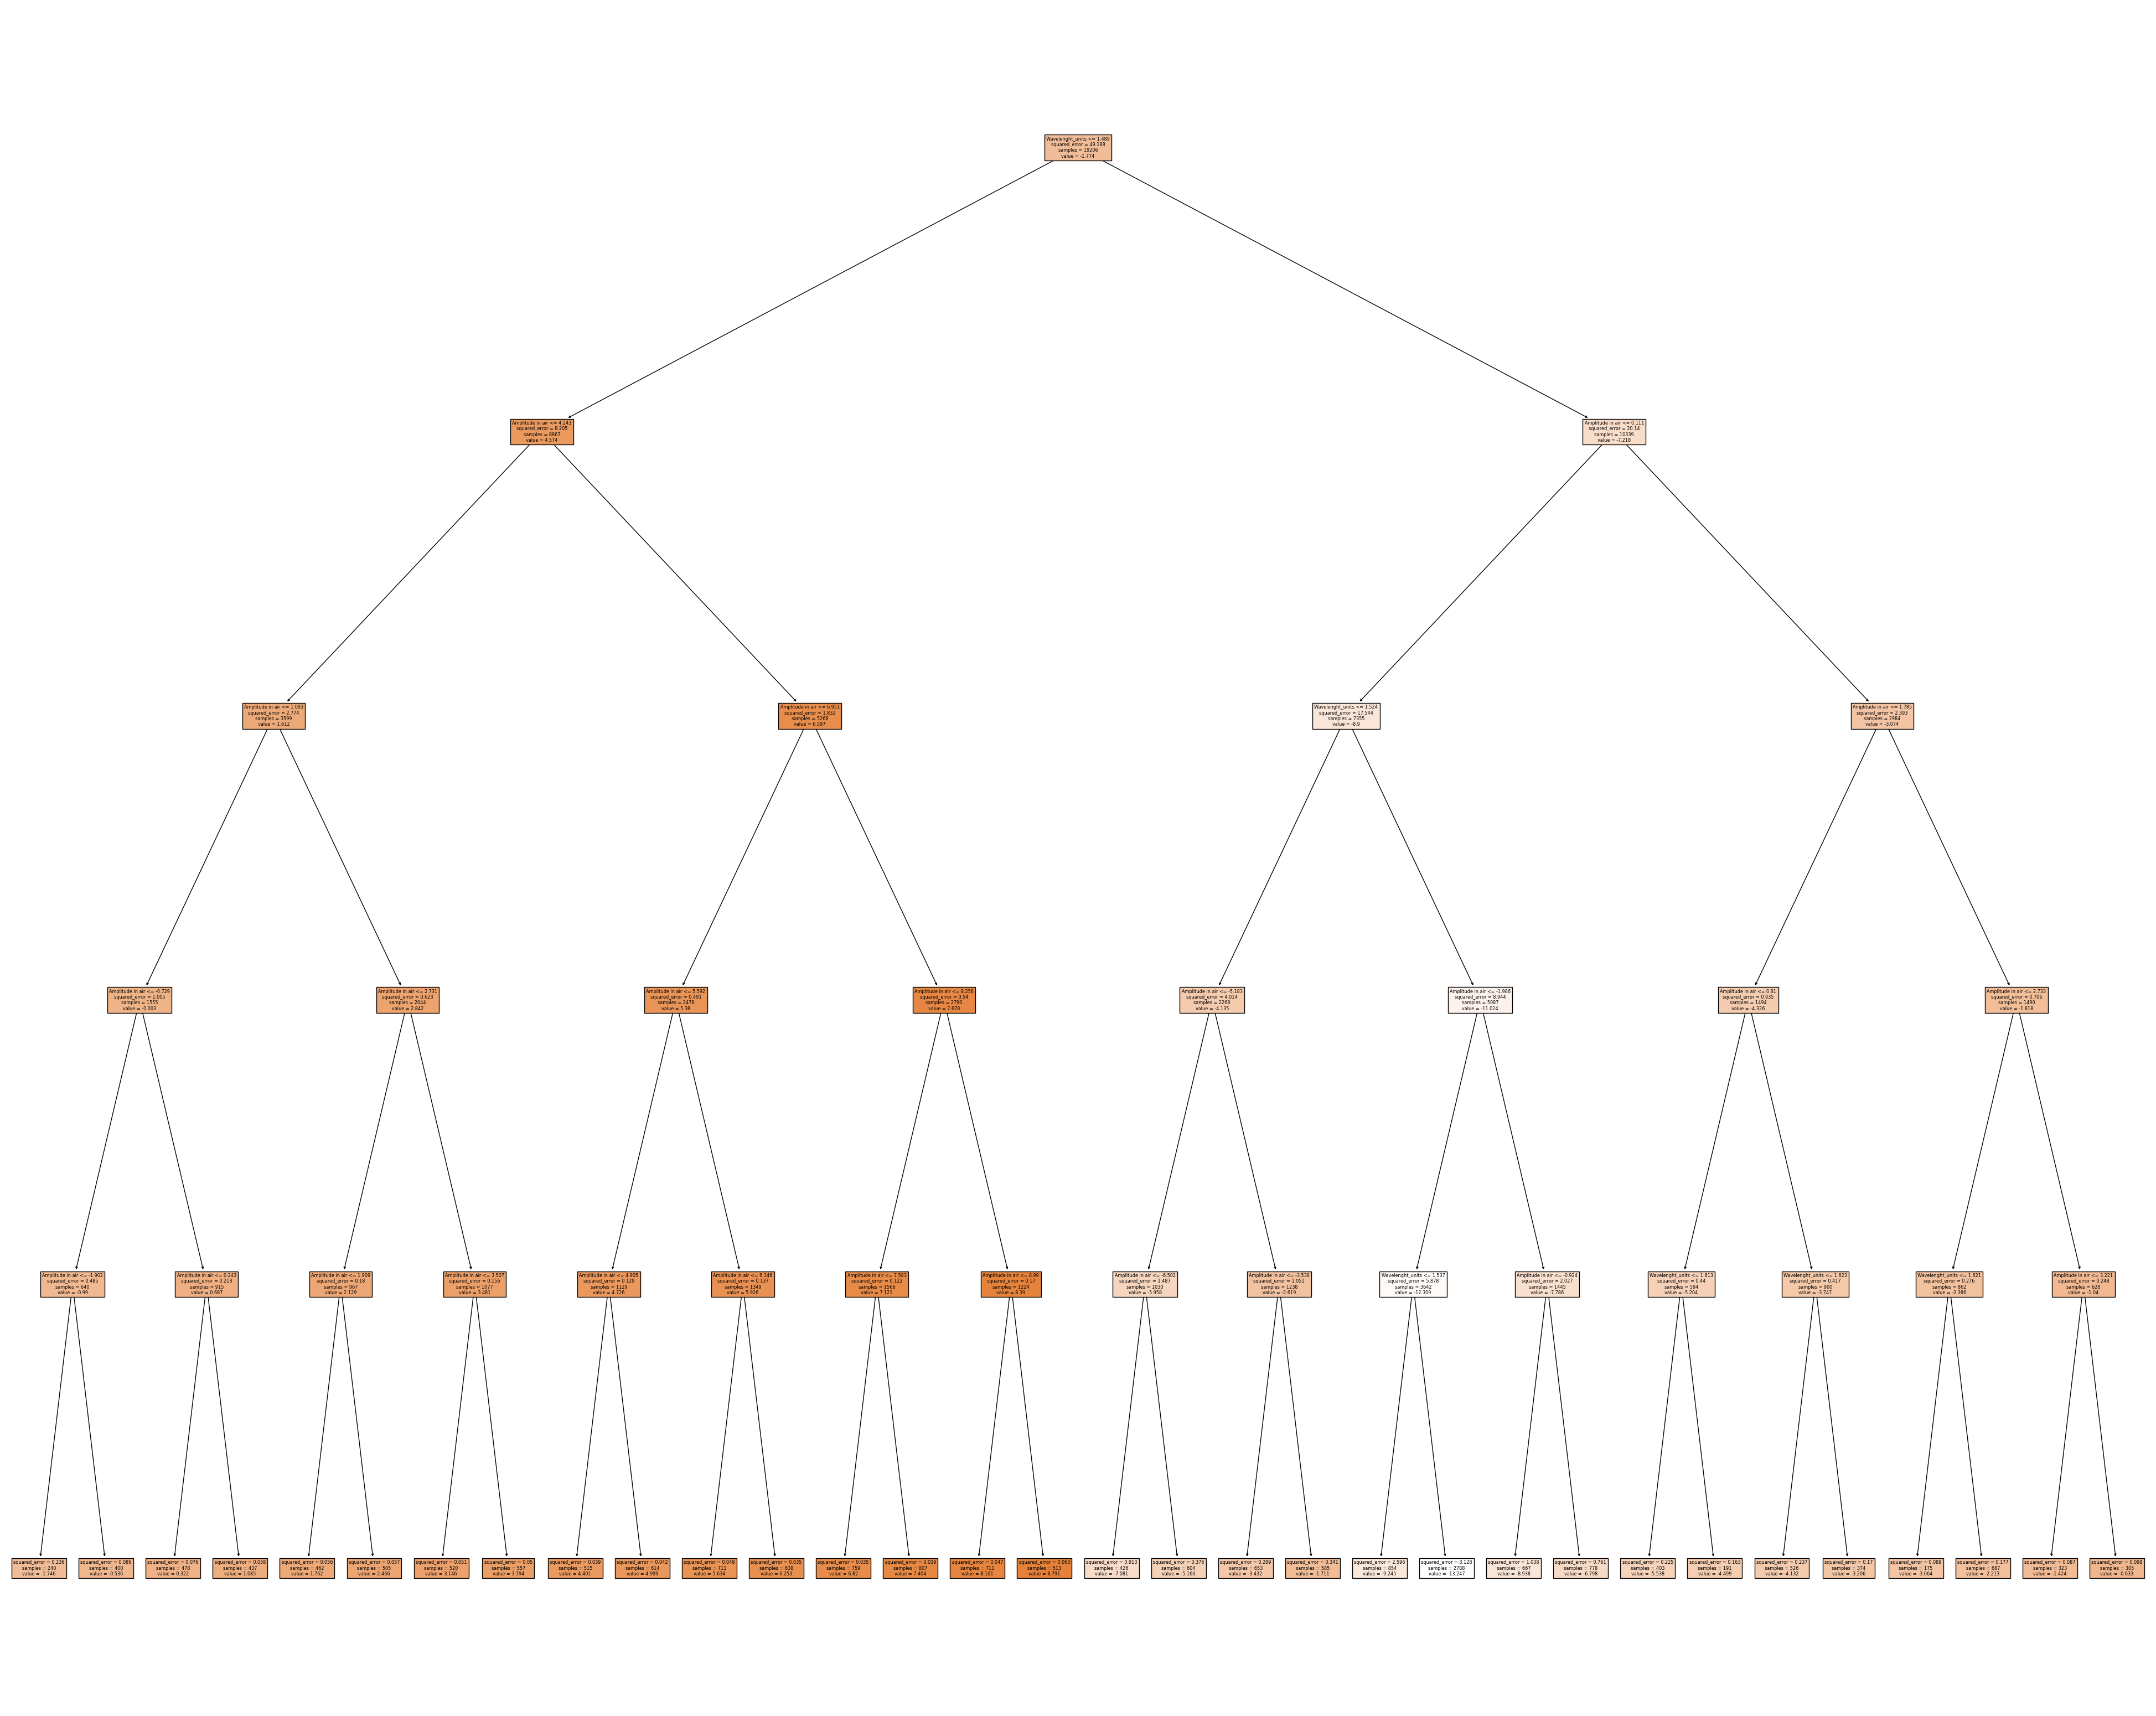

In [54]:
# model fit of izopropanol tree regression - MaxDepth = 5

model_izo_dt = DecisionTreeRegressor(random_state=111, max_depth=5)
model_izo_dt.fit(X_izo_train, y_izo_train)

# plotting of the tree

fig = plt.figure(figsize=(50,40), dpi=100)
tree_fig = tree.plot_tree(model_izo_dt,feature_names=X.columns, filled=True)

In [55]:
# Prediction for test set
y_izo_pred = model_izo_dt.predict(X_izo_test)
MAE_tree_test = mean_absolute_error(y_izo_test, y_izo_pred)
rmse_tree_test = np.sqrt(mean_squared_error(y_izo_test, y_izo_pred))
r2_tree_test = r2_score(y_izo_test, y_izo_pred)

#prediction of train set
y_izo_train_pred = model_izo_dt.predict(X_izo_train)
MAE_tree_train = mean_absolute_error(y_izo_train, y_izo_train_pred)
rmse_tree_train = np.sqrt(mean_squared_error(y_izo_train, y_izo_train_pred))
r2_tree_train = r2_score(y_izo_train, y_izo_train_pred)

print('Parameters for Decision Tree in IZOPROPANOL - model with max_depth=5')

print('MAE of decission tree regressor test set in izopropanol:', MAE_tree_test)
print('MAE of decission tree regressor train set in izopropanol:', MAE_tree_train)
print('RMSE of decission tree regressor for test set in izopropanol:', rmse_tree_test)
print('RMSE of decission tree regressor for train set in izopropanol:', rmse_tree_train)

print('model score for train set:', model_dt.score(X_izo_train,y_izo_train))
print('model score for test set:', model_dt.score(X_izo_test,y_izo_test))
print('R2 of decission tree regressor for test set in izopropanol:', r2_tree_test)
print('R2 of decission tree regressor for train set in izopropanol:', r2_tree_train)


Parameters for Decision Tree in IZOPROPANOL - model with max_depth=5
MAE of decission tree regressor test set in izopropanol: 0.5350185742291392
MAE of decission tree regressor train set in izopropanol: 0.5385835507357924
RMSE of decission tree regressor for test set in izopropanol: 0.8561714287834404
RMSE of decission tree regressor for train set in izopropanol: 0.8604312912803649
model score for train set: 0.9932142466365468
model score for test set: 0.9932725103941771
R2 of decission tree regressor for test set in izopropanol: 0.9850721927483843
R2 of decission tree regressor for train set in izopropanol: 0.98494871018537


Function for creating a df with parameters should be generated OR ML flow could be used

The best model is polynominal regression with degree=4 -> highest R2 and lowest MSE were obtained.

<h2>4.5. MODEL: autoML</h2>

AutoML model is not working, some libraries needs to be installed

In [ ]:
!pip install flaml
!pip install fairlearn
!pip install interpret-community
!pip install raiwidgets
!pip install lightgbm

In [ ]:
conda install py-xgboost

In [ ]:
# Train a model with FLAML
from flaml import AutoML



# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 1,  # in seconds
    "metric": 'mae',
    "task": 'regression'
}
# Train with labeled input data

#water
automl.fit(X_train=X_water_train, y_train=y_water_train,
           **automl_settings)

# Predict
print(automl.predict(X_water_train))
# Print the best model
print(automl.model.estimator)